In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns 
%matplotlib inline 
import plotly.graph_objects as go
import plotly.express as pex
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
from plotly.subplots import make_subplots
import calmap
import squarify
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter


In [2]:
# Load the data set 

netflix = pd.read_csv('Resources/netflix_titles.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:
netflix.shape

(6234, 12)

In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
show_id         6234 non-null int64
type            6234 non-null object
title           6234 non-null object
director        4265 non-null object
cast            5664 non-null object
country         5758 non-null object
date_added      6223 non-null object
release_year    6234 non-null int64
rating          6224 non-null object
duration        6234 non-null object
listed_in       6234 non-null object
description     6234 non-null object
dtypes: int64(2), object(10)
memory usage: 584.5+ KB


Looks like director, cast, and country have the most missing values. Based on our goals, these columns wont be relevant in our analysis. 

In [5]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
netflix = netflix.rename({'type': 'show type','listed_in': 'genre', 'rating':'film_rating', 'release_year':'original_release_year'}, axis=1)

netflix.columns

Index(['show_id', 'show type', 'title', 'director', 'cast', 'country',
       'date_added', 'original_release_year', 'film_rating', 'duration',
       'genre', 'description'],
      dtype='object')

In [7]:
netflix.dtypes

show_id                   int64
show type                object
title                    object
director                 object
cast                     object
country                  object
date_added               object
original_release_year     int64
film_rating              object
duration                 object
genre                    object
description              object
dtype: object

In [8]:
netflix_cleaned = netflix.dropna(subset=['date_added'])
netflix_cleaned.head()

,show_id,show type,title,director,cast,country,date_added,original_release_year,film_rating,duration,genre,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [9]:
netflix_cleaned['date_added']

0       September 9, 2019
1       September 9, 2016
2       September 8, 2018
3       September 8, 2018
4       September 8, 2017
5       September 8, 2017
6       September 8, 2017
7       September 8, 2017
8       September 8, 2017
9       September 8, 2017
10      September 8, 2017
11      September 8, 2017
12      September 8, 2017
13      September 8, 2017
14      September 8, 2017
15      September 8, 2017
16      September 8, 2017
17      September 8, 2017
18      September 8, 2017
19      September 8, 2017
20      September 8, 2017
21      September 8, 2017
22      September 8, 2017
23      September 8, 2017
24      September 8, 2017
25      September 8, 2015
26      September 7, 2018
27      September 7, 2018
28      September 7, 2018
29      September 7, 2018
              ...        
6193       April 29, 2019
6194       April 28, 2019
6195       April 27, 2018
6196       April 27, 2017
6197       April 26, 2019
6198       April 26, 2019
6199       April 23, 2019
6200       A

In [10]:
netflix_cleaned['date_added'] = pd.to_datetime(netflix_cleaned['date_added'])
netflix_cleaned.dtypes

C:\Users\alao8\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



show_id                           int64
show type                        object
title                            object
director                         object
cast                             object
country                          object
date_added               datetime64[ns]
original_release_year             int64
film_rating                      object
duration                         object
genre                            object
description                      object
dtype: object

In [11]:
netflix_cleaned['date_added'].value_counts()

2020-01-01    126
2019-11-01    104
2018-03-01     79
2019-12-31     76
2019-10-01     74
2018-10-01     74
2019-07-01     63
2018-11-01     61
2018-01-01     59
2017-10-01     53
2019-02-01     48
2018-04-01     47
2017-09-01     47
2018-05-01     45
2017-07-01     44
2017-05-01     44
2019-01-01     41
2018-07-01     41
2017-08-01     40
2019-09-01     40
2018-08-01     38
2017-03-10     37
2019-12-01     35
2019-08-01     35
2017-11-01     35
2019-11-20     35
2019-03-01     35
2016-01-01     34
2017-06-01     34
2017-03-31     32
             ... 
2019-02-03      1
2016-09-06      1
2017-10-28      1
2014-12-19      1
2017-06-27      1
2019-10-07      1
2014-01-17      1
2017-06-25      1
2018-06-14      1
2016-03-02      1
2017-04-23      1
2017-08-23      1
2019-01-21      1
2018-08-30      1
2017-08-16      1
2017-11-06      1
2016-11-19      1
2015-02-15      1
2016-05-06      1
2018-05-02      1
2017-07-10      1
2018-10-28      1
2017-09-28      1
2017-07-25      1
2015-05-10

In [12]:
netflix_cleaned['year_released_on_nf'] = pd.DatetimeIndex(netflix_cleaned['date_added']).year
netflix_cleaned['month_released_on_nf'] = pd.DatetimeIndex(netflix_cleaned['date_added']).month
netflix_cleaned['day_released_on_nf'] = pd.DatetimeIndex(netflix_cleaned['date_added']).day
netflix_cleaned.head()

C:\Users\alao8\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\alao8\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\alao8\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

,show_id,show type,title,director,cast,country,date_added,original_release_year,film_rating,duration,genre,description,year_released_on_nf,month_released_on_nf,day_released_on_nf
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,9,9
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016,9,9
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018,9,8
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018,9,8
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017,9,8


In [13]:
netflix_cleaned['film_rating'].value_counts()

TV-MA       2025
TV-14       1695
TV-PG        699
R            508
PG-13        286
NR           217
PG           184
TV-Y7        168
TV-G         149
TV-Y         142
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: film_rating, dtype: int64

In [14]:
netflix_cleaned['season_for_tv_show'] = netflix_cleaned.apply(lambda x : x['duration'].split(' ')[0] if "Season" in x['duration'] else '',axis=1)

netflix_cleaned['duration'] = netflix_cleaned.apply(lambda x : x['duration'].split(' ')[0] if "Season" not in x['duration'] else '',axis=1)



C:\Users\alao8\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\alao8\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [15]:
netflix_df = netflix_cleaned[['show type', 'title', 'film_rating','duration','genre','season_for_tv_show', 'year_released_on_nf','month_released_on_nf','day_released_on_nf','director','country','original_release_year']]

In [16]:
netflix_df.isnull().sum()

show type                   0
title                       0
film_rating                 9
duration                    0
genre                       0
season_for_tv_show          0
year_released_on_nf         0
month_released_on_nf        0
day_released_on_nf          0
director                 1958
country                   474
original_release_year       0
dtype: int64

In [17]:
netflix_df.shape

(6223, 12)

In [18]:
netflix_df.tail()

,show type,title,film_rating,duration,genre,season_for_tv_show,year_released_on_nf,month_released_on_nf,day_released_on_nf,director,country,original_release_year
6218,TV Show,Talking Tom and Friends,TV-G,,"Kids' TV, TV Comedies",2,2019,4,10,NaN,"Cyprus, Austria, Thailand",2017
6219,TV Show,Pokémon the Series,TV-Y7-FV,,"Anime Series, Kids' TV",2,2019,4,1,NaN,Japan,2019
6220,TV Show,Justin Time,TV-Y,,Kids' TV,2,2016,4,1,NaN,Canada,2012
6221,TV Show,Terrace House: Boys & Girls in the City,TV-14,,"International TV Shows, Reality TV",2,2016,4,1,NaN,Japan,2016
6222,TV Show,Weeds,TV-MA,,"TV Comedies, TV Dramas",8,2014,4,1,NaN,United States,2012


In [19]:
netflix_df['year_released_on_nf'].value_counts()

2019    2349
2018    1782
2017    1300
2016     456
2020     184
2015      90
2014      25
2011      13
2013      12
2012       7
2009       2
2008       2
2010       1
Name: year_released_on_nf, dtype: int64

In [20]:
nf_copy = netflix_df.copy()

nf_copy.head()

,show type,title,film_rating,duration,genre,season_for_tv_show,year_released_on_nf,month_released_on_nf,day_released_on_nf,director,country,original_release_year
0,Movie,Norm of the North: King Sized Adventure,TV-PG,90,"Children & Family Movies, Comedies",,2019,9,9,"Richard Finn, Tim Maltby","United States, India, South Korea, China",2019
1,Movie,Jandino: Whatever it Takes,TV-MA,94,Stand-Up Comedy,,2016,9,9,NaN,United Kingdom,2016
2,TV Show,Transformers Prime,TV-Y7-FV,,Kids' TV,1,2018,9,8,NaN,United States,2013
3,TV Show,Transformers: Robots in Disguise,TV-Y7,,Kids' TV,1,2018,9,8,NaN,United States,2016
4,Movie,#realityhigh,TV-14,99,Comedies,,2017,9,8,Fernando Lebrija,United States,2017


# Data Analysis

First let's look at the distribution of TV Shows and Movies offered on Netflix

In [319]:
show_types = netflix_df['show type'].value_counts().reset_index()
show_types = show_types.rename(columns={'index':'Type',
                                       'show type':'Count'})

pie_chart = go.Pie(labels=show_types['Type'], values=show_types['Count'],
                   pull=[0.05,0],
                   marker = dict(colors=["#6ad49b", "#1f77b4"]))

fig_layout = go.Layout(title=" Distribution of Show Types on Netflix", height = 400, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data= pie_chart, layout=fig_layout)
iplot(fig)


More than 2/3 (68.5%) are Movies and remaining 31.5% are TV shows. 

In [320]:
d1 = nf_copy[nf_copy["show type"] == "TV Show"]
d2 = nf_copy[nf_copy["show type"] == "Movie"]

col = "year_released_on_nf"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#1f77b4"))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

Netflix is continuously adding content every year. Movies have a larger presence than TV shows. In 2019, at least half of the listings were TV shows. The rise and popularity of TV shows can be attributed to the potential for extended narratives which a 2-2.5 hour movie may not fulfill. This is an interesting area that requires more data to gain insight. Additionally, the low amount of content from 2008 to 2014 needs to be further investigated. https://www.investopedia.com/articles/markets/051215/who-are-netflixs-main-competitors-nflx.asp

In [333]:
#Created a dict to change the numerics months to strings so easier to read on graph 
months = {'1': 'January', '2':'February', '3':'March','4':'April', '5':'May', '6':'June', '7':'July', '8':'August', '9':'September', '10':'October', '11':'November','12':'December'}

#Change the date time month_released_on_nf column to string 
netflix_df['month_released_on_nf'] = netflix_df['month_released_on_nf'].astype(str)
nf_df = netflix_df.replace({'month_released_on_nf': months})

nf_df.head()

C:\Users\alao8\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,show type,title,film_rating,duration,genre,season_for_tv_show,year_released_on_nf,month_released_on_nf,day_released_on_nf,director,country,original_release_year
0,Movie,Norm of the North: King Sized Adventure,TV-PG,90,"Children & Family Movies, Comedies",,2019,September,9,"Richard Finn, Tim Maltby","United States, India, South Korea, China",2019
1,Movie,Jandino: Whatever it Takes,TV-MA,94,Stand-Up Comedy,,2016,September,9,NaN,United Kingdom,2016
2,TV Show,Transformers Prime,TV-Y7-FV,,Kids' TV,1,2018,September,8,NaN,United States,2013
3,TV Show,Transformers: Robots in Disguise,TV-Y7,,Kids' TV,1,2018,September,8,NaN,United States,2016
4,Movie,#realityhigh,TV-14,99,Comedies,,2017,September,8,Fernando Lebrija,United States,2017


Text(0.5, 1.0, 'Distribution of Content Duration')

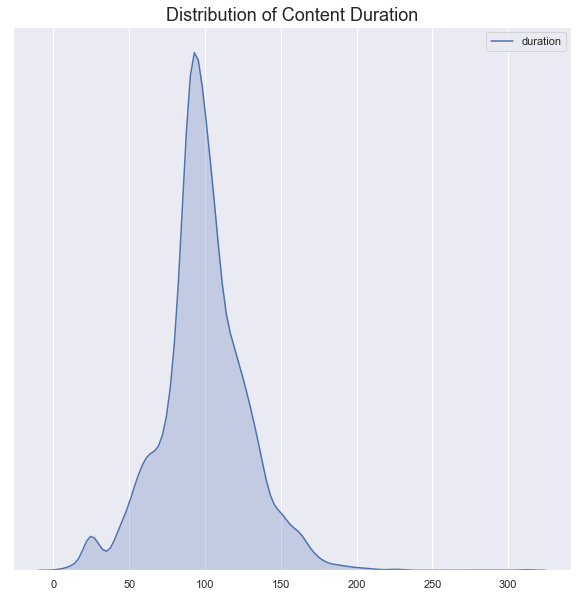

In [356]:
# sns.set(style="darkgrid")
# sns.kdeplot(data=nf_df['duration'], shade=True)

duration = pd.Series(nf_df['duration'])

duration = pd.to_numeric(duration, errors='coerce')

ax = sns.set(style="darkgrid")
ax = sns.kdeplot(data=duration, shade=True)

ax.get_yaxis().set_visible(False)
ax.set_title('Distribution of Content Duration', fontsize=18)

In [358]:
month_releases = nf_df['month_released_on_nf'].value_counts().reset_index()
month_releases = month_releases.rename(columns = {'index':'Month','month_released_on_nf':'Count'})

bar_graph = go.Bar(x=month_releases['Month'],y=month_releases['Count'], name="Number of Content Added", marker=dict(color="#6ad49b"))
data = [bar_graph]
layout = go.Layout(title="Content Released by Month", legend =dict(x=0.1, y=1.1))
fig =go.Figure(data,layout=layout)
fig.show()

Overall,content is generally released during Fall especially during holidays. It is the optimal time to release content since a majority of people will be with their families or staying inside due to the colder weather in United States.

Text(0.5, 1.0, 'Content Original Release Years')

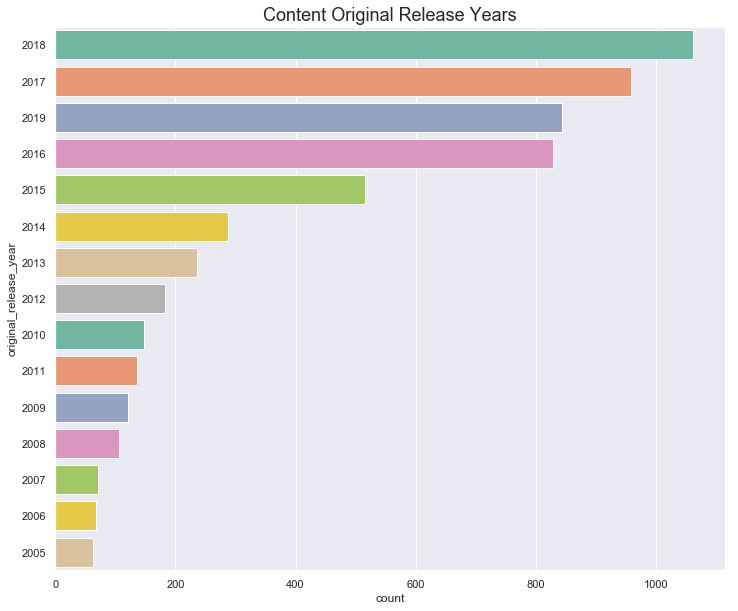

In [359]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="original_release_year", data=nf_df, palette="Set2", order=nf_df['original_release_year'].value_counts().index[0:15])
ax.set_title("Content Original Release Years", fontsize=18)

From the last 15 years, most of the content was released in 2018.

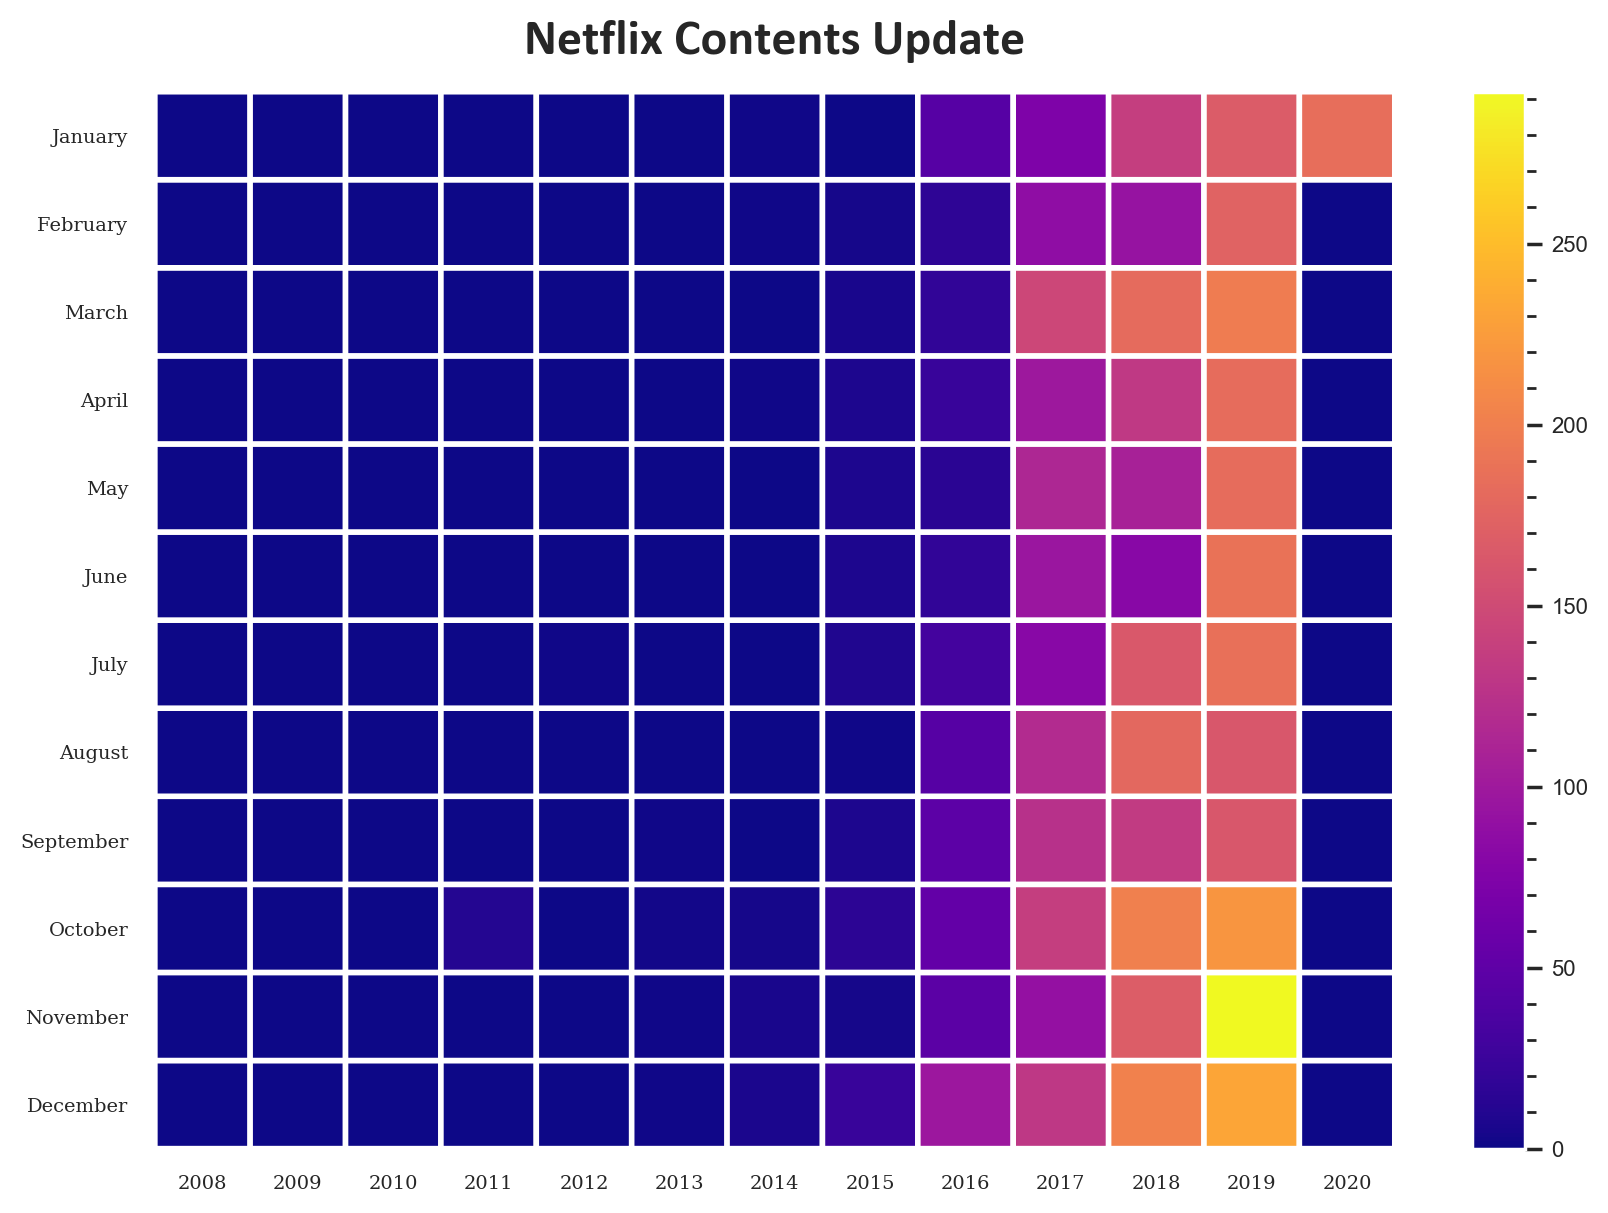

In [304]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]


new_df = nf_df.groupby('year_released_on_nf')['month_released_on_nf'].value_counts().unstack().fillna(0)[month_order].T

plt.figure(figsize=(10,7), dpi=200)
plt.pcolor(new_df, cmap='plasma', edgecolors= 'white', linewidths=2)
plt.xticks(np.arange(0.5, len(new_df.columns), 1), new_df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(new_df.index), 1), new_df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=18, fontfamily='calibri', fontweight='bold', position=(0.5, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

In [190]:
nf_comp_disney = netflix_cleaned.loc[(netflix_cleaned['date_added'] >= '2019-11-01') & (netflix_cleaned['date_added'] <= '2020-04-01')]

nf_comp_disney =nf_comp_disney[nf_comp_disney['country'] == 'United States']

nf_comp_disney = nf_comp_disney[['show type', 'title', 'director', 'cast', 'country', 'date_added', 'film_rating']]
nf_comp_disney['month_add_on_nf'] = pd.DatetimeIndex(nf_comp_disney['date_added']).month

#Created a dict to change the numerics months to strings so easier to read on graph 
months = {'1': 'January', '2':'February', '3':'March','4':'April', '11':'November','12':'December'}

#Change the date time month_add_on_nf column to string 
nf_comp_disney['month_add_on_nf']  = nf_comp_disney['month_add_on_nf'].astype(str)
nf_comp_disney = nf_comp_disney.replace({'month_add_on_nf': months})

nov_april_rl = nf_comp_disney['month_add_on_nf'].value_counts().reset_index()
nov_april_rl = nov_april_rl.rename(columns={'index':'Month',
                                           'month_add_on_nf': 'Count'})

bar_graph = go.Bar(x=nov_april_rl ['Month'],y=nov_april_rl ['Count'], name="Number of Content Added from November 2019 to January 2020", marker=dict(color="#6ad49b"))
data = [bar_graph]
layout = go.Layout(title="Number of Content Added from Nov. 2019 to Jan. 2020", legend =dict(x=0.1, y=1.1))
fig =go.Figure(data,layout=layout)
fig.show()


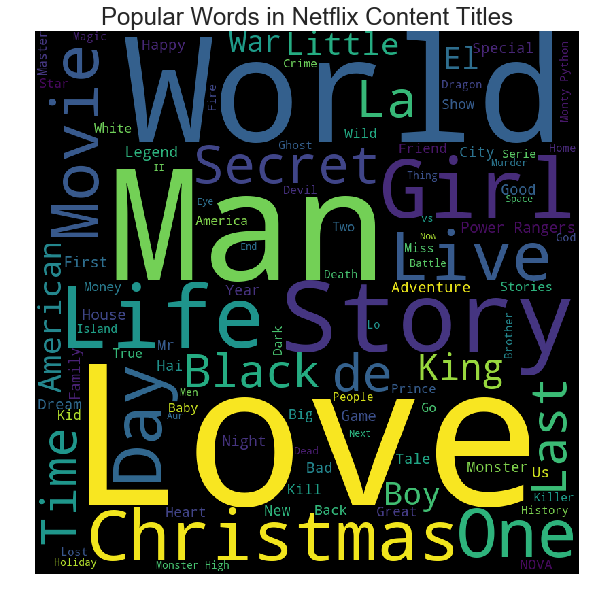

In [327]:
plt.rcParams['figure.figsize'] = (10,10)

wordcloud = WordCloud(stopwords=STOPWORDS, background_color= 'black',
                     width= 800, height=800, max_words = 100).generate(' '.join(nf_df['title']))

plt.imshow(wordcloud)
plt.axis('off')
plt.title('Popular Words in Netflix Content Titles', fontsize =24)
plt.show()

In [227]:
import re 
nf_titles = nf_df['title'].tolist()

love_mentions = 0
pattern = '[Ll]ove'

for s in nf_titles:
    if re.search(pattern,s):
        love_mentions+=1
print(love_mentions)


135


In [360]:
def pie_plot(cnt_srs, title):
    labels=cnt_srs.index
    values=cnt_srs.values
    trace = go.Pie(labels=labels, 
                   values=values, 
                   title=title, 
                   hoverinfo='percent+value', 
                   textinfo='percent',
                   textposition='inside',
                   hole=0.7,
                   showlegend=True,
                   marker=dict(colors=plt.cm.viridis_r(np.linspace(0, 1, 14)),
                               line=dict(color='#000000',
                                         width=2),
                              )
                  )
    return trace

py.iplot([pie_plot(nf_df['film_rating'].value_counts(), 'Distribution of Film Ratings')])


In [368]:
df_tv = nf_df[nf_df['show type'] == 'TV Show']
df_mov = nf_df[nf_df['show type'] == 'Movie']

df_temp_tv = df_tv['film_rating'].value_counts().reset_index()
df_mov_tv = df_mov['film_rating'].value_counts().reset_index()

trace_1 = go.Bar(
                x = df_temp_tv['index'],
                y= df_temp_tv['film_rating'],
                name= 'TV Shows',
                marker = dict(color = 'rgb(65,105,225)'))

trace_2 = go.Bar(
                x = df_mov_tv['index'],
                y= df_mov_tv['film_rating'],
                name= 'Movies',
                marker = dict(color='rgb(0,255,127)'))

layout = go.Layout(template = 'plotly_dark', title = 'Ratings Of Netflix Content',
                  xaxis=dict(title='Film Rating'), yaxis=dict(title='Count'))

fig = go.Figure(data = [trace_1, trace_2], layout = layout)
fig.show()

Most of the content is rated TV-MA, TV-14 and TV-PG. We can deduce that Netflix's customer base are older adults. Programming rated TV-MA in the United States by the TV Parental Guidelines signifies content for mature audiences only. Programs with this rating are usually not suitable for anyone under 17 years of age (under 18 or 21 in some networks/services). Content may contain strong coarse language, explicit (in some cases, pornographic) strong sexual content, nudity, or intense/graphic violence.

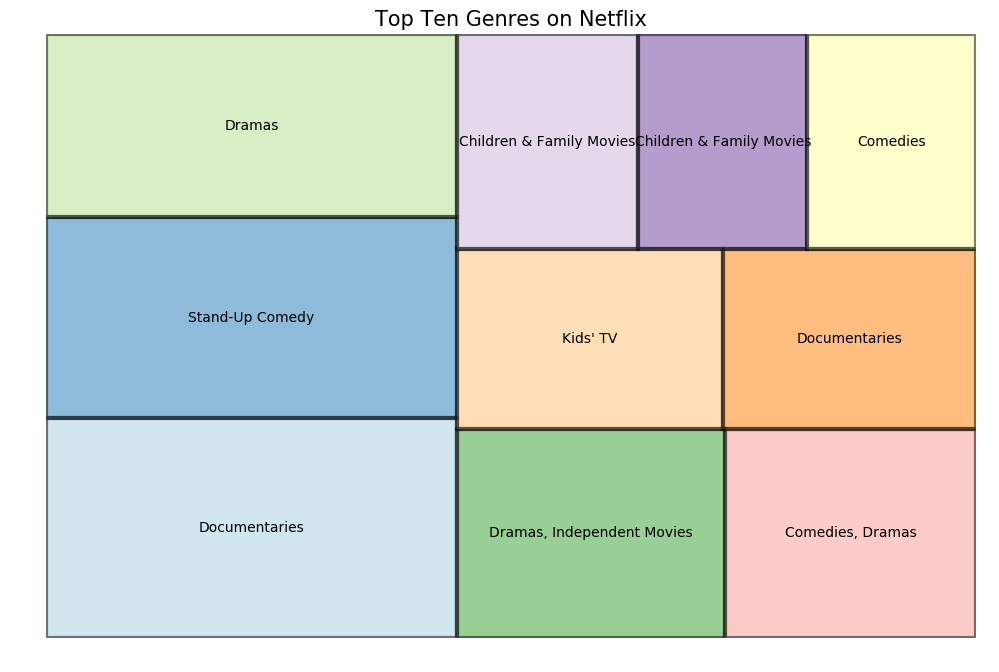

In [121]:
nf_df_genre = nf_df['genre'].value_counts().reset_index()[:10]
nf_df_genre = nf_df_genre.rename(columns={'index': 'Genre',
                           'genre':'Count'})
nf_df_genre['Genre'] = nf_df_genre['Genre'].str.replace(', International Movies', '').str.replace(', Comedies', '')


sizes=np.array(nf_df_genre['Count'])
labels=nf_df_genre['Genre']
colors = [plt.cm.Paired(i/float(len(labels))) for i in range(len(labels))]
plt.figure(figsize=(12,8), dpi= 100)
squarify.plot(sizes=sizes, label=labels, color = colors, alpha=.5, edgecolor="black", linewidth=3, text_kwargs={'fontsize':10})
plt.title('Top Ten Genres on Netflix', fontsize = 15)
plt.axis('off')
plt.show()

In [362]:
nf_countries = nf_df['country'].value_counts().reset_index()

nf_countries= nf_countries.rename(columns={'index':'Country',
                            'country':'Count'})
top_20_countries = nf_countries[:20]
top_20_countries

fig = pex.pie(top_20_countries, values='Count', names='Country',
             title='Top 20 Countries by Content Production',
             hover_data=['Count'], labels=['Country'])

fig.show()

Netflix is an American media-services provider and production company headquartered in Los Gatos, California, founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California. It's not surprising that 45% of content was produced in the United States. India has the second biggest share at 17.3%.

In [369]:
us_mov_dct = nf_df[nf_df['show type'] == 'Movie'] 
us_mov_dct = us_mov_dct[us_mov_dct['country'] == 'United States']


categories = ", ".join(us_mov_dct['director'].fillna("")).split(", ")
counter_list = Counter(categories).most_common(11)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(
                x = labels,
                y = values,
                marker = dict(color = '#9467bd',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'Top 10 U.S. Movie Directors by number of content' , yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [158]:
nf_casts = netflix_cleaned[['show type', 'title', 'film_rating','duration','genre','cast','season_for_tv_show', 'year_released_on_nf','month_released_on_nf','day_released_on_nf','director','country','original_release_year']]
nf_casts.head()

,show type,title,film_rating,duration,genre,cast,season_for_tv_show,year_released_on_nf,month_released_on_nf,day_released_on_nf,director,country,original_release_year
0,Movie,Norm of the North: King Sized Adventure,TV-PG,90,"Children & Family Movies, Comedies","Alan Marriott, Andrew Toth, Brian Dobson, Cole...",,2019,9,9,"Richard Finn, Tim Maltby","United States, India, South Korea, China",2019
1,Movie,Jandino: Whatever it Takes,TV-MA,94,Stand-Up Comedy,Jandino Asporaat,,2016,9,9,NaN,United Kingdom,2016
2,TV Show,Transformers Prime,TV-Y7-FV,,Kids' TV,"Peter Cullen, Sumalee Montano, Frank Welker, J...",1,2018,9,8,NaN,United States,2013
3,TV Show,Transformers: Robots in Disguise,TV-Y7,,Kids' TV,"Will Friedle, Darren Criss, Constance Zimmer, ...",1,2018,9,8,NaN,United States,2016
4,Movie,#realityhigh,TV-14,99,Comedies,"Nesta Cooper, Kate Walsh, John Michael Higgins...",,2017,9,8,Fernando Lebrija,United States,2017


In [370]:
us_mov_cast = nf_casts[nf_casts['show type'] == 'Movie'] 
us_mov_df = us_mov_cast[us_mov_cast['country'] == 'United States']


categories = ", ".join(us_mov_df['cast'].fillna("")).split(", ")
counter_list = Counter(categories).most_common(11)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(
                x = labels,
                y = values,
                marker = dict(color = 'rgb(0,251,153)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'Top 10 US Actors and Actresses by appearances', yaxis =  dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [372]:
uk_mov_dct = nf_df[nf_df['show type'] == 'Movie'] 
uk_mov_dct = uk_mov_dct[uk_mov_dct['country'] == 'United Kingdom']


categories = ", ".join(uk_mov_dct['director'].fillna("")).split(", ")
counter_list = Counter(categories).most_common(11)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(
                x = labels,
                y = values,
                marker = dict(color = '#e377c2',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'Top 10 United Kingdom Movie Directors by number of content', yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [373]:
uk_mov_cast = nf_casts[nf_casts['show type'] == 'Movie'] 
uk_mov_df = uk_mov_cast[uk_mov_cast['country'] == 'United Kingdom']


categories = ", ".join(uk_mov_df['cast'].fillna("")).split(", ")
counter_list = Counter(categories).most_common(11)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(
                x = labels,
                y = values,
                marker = dict(color = '#17becf',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'Top 10 UK Actors and Actresses by appearances',yaxis =  dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

# IMDB Ratings of Netflix Content

In [268]:
imdb_movies = pd.read_csv('Resources/IMDb movies.csv', usecols=['title', 'year', 'genre'])
imdb_rating = pd.read_csv('Resources/IMDb ratings.csv', usecols=['weighted_average_vote'])

movie_ratings = pd.DataFrame({'Title': imdb_movies.title,
                             'Release Year': imdb_movies.year,
                             'Genre': imdb_movies.genre,
                             'Rating': imdb_rating.weighted_average_vote})

# Drop the duplicate records 
movie_ratings.drop_duplicates(subset=['Title','Release Year', 'Rating'], inplace=True)
movie_ratings.dropna()

,Title,Release Year,Genre,Rating
0,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",6.1
1,Den sorte drøm,1911,Drama,5.9
2,Cleopatra,1912,"Drama, History",5.2
3,L'Inferno,1911,"Adventure, Drama, Fantasy",7.0
4,"From the Manger to the Cross; or, Jesus of Naz...",1912,"Biography, Drama",5.7
5,Madame DuBarry,1919,"Biography, Drama, Romance",6.8
6,Quo Vadis?,1913,"Drama, History",6.2
7,Independenta Romaniei,1912,"History, War",6.7
8,Richard III,1912,Drama,5.5
9,Atlantis,1913,Drama,6.7


In [288]:
imdb_netflix = movie_ratings.merge(nf_df, left_on = 'Title', right_on = 'title', how='inner')

imdb_netflix= imdb_netflix.sort_values('Rating', ascending=False)

imdb_netflix['Genre'] = imdb_netflix['Genre'].str.split(",").apply(lambda x:x[0])
imdb_netflix.head()

,Title,Release Year,Genre,Rating,show type,title,film_rating,duration,genre,season_for_tv_show,year_released_on_nf,month_released_on_nf,day_released_on_nf,director,country,original_release_year
758,Safe,2019,Action,9.5,TV Show,Safe,TV-MA,,"British TV Shows, Crime TV Shows, Internationa...",1,2019,February,5,NaN,United Kingdom,2018
1526,Oththa Seruppu Size 7,2019,Drama,9.1,Movie,Oththa Seruppu Size 7,TV-MA,103,"Dramas, International Movies, Thrillers",,2019,November,4,Parthiban,India,2019
1408,Innocent,2017,Comedy,9.0,TV Show,Innocent,TV-MA,,"Crime TV Shows, International TV Shows, TV Dramas",1,2019,January,23,Seren Yüce,Turkey,2017
723,Pulp Fiction,1994,Crime,8.9,Movie,Pulp Fiction,R,154,"Classic Movies, Cult Movies, Dramas",,2019,January,1,Quentin Tarantino,United States,1994
701,Schindler's List,1993,Biography,8.9,Movie,Schindler's List,R,195,"Classic Movies, Dramas",,2018,April,1,Steven Spielberg,United States,1993


In [291]:
imdb_netflix_cleaned = imdb_netflix.drop_duplicates(['Title'], keep = 'last')

(2294, 16)

In [367]:
top_rated_nf =imdb_netflix_cleaned [:10]
fig = plt.figure(figsize=(10,10))
fig = pex.sunburst(top_rated_nf, path=['Title'], values='Rating', color='Rating', color_continuous_scale='RdBu')
fig.show()

<Figure size 720x720 with 0 Axes>